<a href="https://colab.research.google.com/github/Aviralkiller156/Dog_Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# End-to-end Multi-class Dog Breed Classification
#This notebook builds an end to end multi class image classifier using Tensorflow 2.0 and TensorFlow Hub
##1. Problem
#Identifying the breed of a dog given the image of a dog.
#2. Data
## The data we're using is from Kaggle's dog breed identification completion.
##4. Evaluation 
## The evaluation is a file with probabilities for each dog breed for each image.
##4. Features
#Some information about the data:
#We're dealing with images so deep learning is suitable
#There are around 10000 images in the training and test set each.

In [ ]:
###Getting out worspace ready
#Import TensorFlow
#Import TensorFlow Hub
#Make sure we're using a gpu

In [ ]:
#Unzip the dataset
#Import tensorflow into colab
#Import TensorFlow Hub
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF_hub version:",hub.__version__)
#Check for GPU availability
print("GPU","available (YESSS)" if tf.config.list_physical_devices("GPU") else "Not available")

TF version: 2.12.0
TF_hub version: 0.13.0
GPU available (YESSS)


##Getting our data ready (turning it into tensors(numerical representation))


In [ ]:
#Let's start by accessing our data and checking out the labels.
labels_csv=pd.read_csv("/content/drive/MyDrive/dog vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


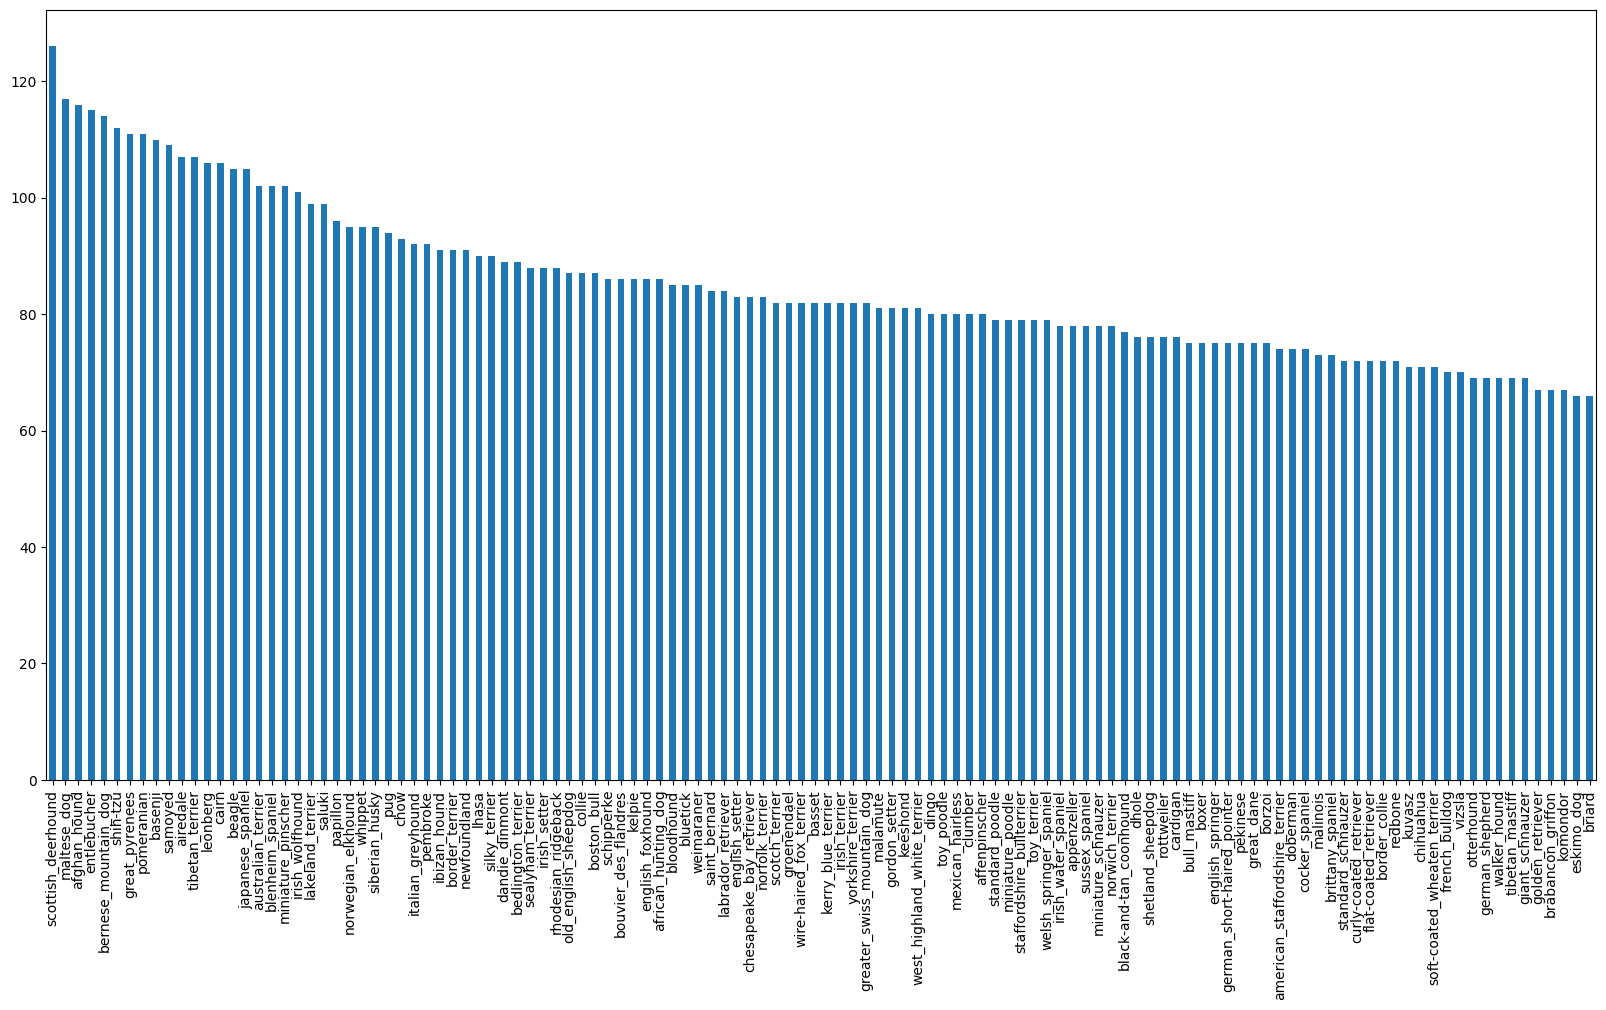

In [ ]:
#How many images are there per breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

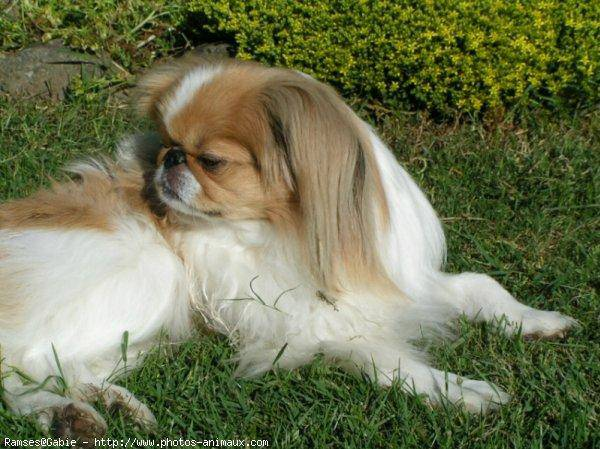

In [ ]:
#Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/dog vision/test/000621fb3cbb32d8935728e48679680e.jpg")

###GEtting images and labels
Let's get a list of our image pathnames.

In [ ]:
filenames=["/content/drive/MyDrive/dog vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

In [ ]:
#Check whether number of file names matches the number of actual images
import os
if len(os.listdir("/content/drive/MyDrive/dog vision/train/"))==len(filenames):
  print("Proceed")
else:
  print("Halt")


Proceed


In [ ]:
len(filenames)

10222

In [ ]:
len(os.listdir("/content/drive/MyDrive/dog vision/train/"))

10222

In [ ]:
#!unzip "/content/drive/MyDrive/dog vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog vision"

In [ ]:
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
#See if number of labels matches the number of filenames
if len(labels)==len(filenames):
  print("Match")
else:
  print("Mismatch")


Match


In [ ]:
#Find the unique values in an np array
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
#Turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(labels)

10222

In [ ]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['/content/drive/MyDrive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Creating out own validation set

In [ ]:
#setup X and y 
X=filenames
y=boolean_labels

# Training a 1000 images. Increase as required.

In [ ]:
#Set number of images to use for experimenting
NUM_IMAGES=1000#@param{type:"slider",min:1000,max:10000}

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

Preprocess Images (turning into tensors)

1) Take an image filepath as input
2)  Use TensorFlow to read the file and save it to a variable 'image'
3) Turn our image into Tensors
4a) Normalize the image 
4) Resize the image to be a shape of (224,244)
5) Return the modified image

In [ ]:
#Convert image to Numpy array 
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
image.max(),image.min()

(255, 0)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Let's make a function to preprocess images that have been converted to tensors

In [ ]:
#Define an image size
IMG_SIZE=224
#Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path an return a tensor
  """
  #Read in an image file
  image=tf.io.read_file(image_path)
  # Turn the image into a numerical tensor with 3 color channels
  image=tf.image.decode_jpeg(image,channels=3)
  #Convert the color channel values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  #Resize image to (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

##Turning our data into batches
Why turn our data into batches?
For 10k+ images in one go, they might not fit into the memory at the same time.
That is why we will operate on 32 images(batch size) at a time.
In order to use TensorFlow effectively, we need our data in tuples which look like:(image,label)

In [ ]:
##Create a simple function to return a tuple(image,label)
def get_image_label(image_path,label):
  """
  Takes an image path and the associated label, processes the image and returns a tuple of (image,label)
  """
  image=process_image(image_path)
  return image,label

Now we've got a way to turn our data into tuples of Tensors in the form:(image,label), let's make a function to make X and y into batches

In [ ]:
#Define the batch size
BATCH_SIZE=32
#Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

##Visualizing the batches 
They can be a little hard to comprehend

In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  """
  Display a plot of 25 images and their labels from a data branch
  """
  #Setup the figure
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the gridlines off
    plt.axis('off')

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

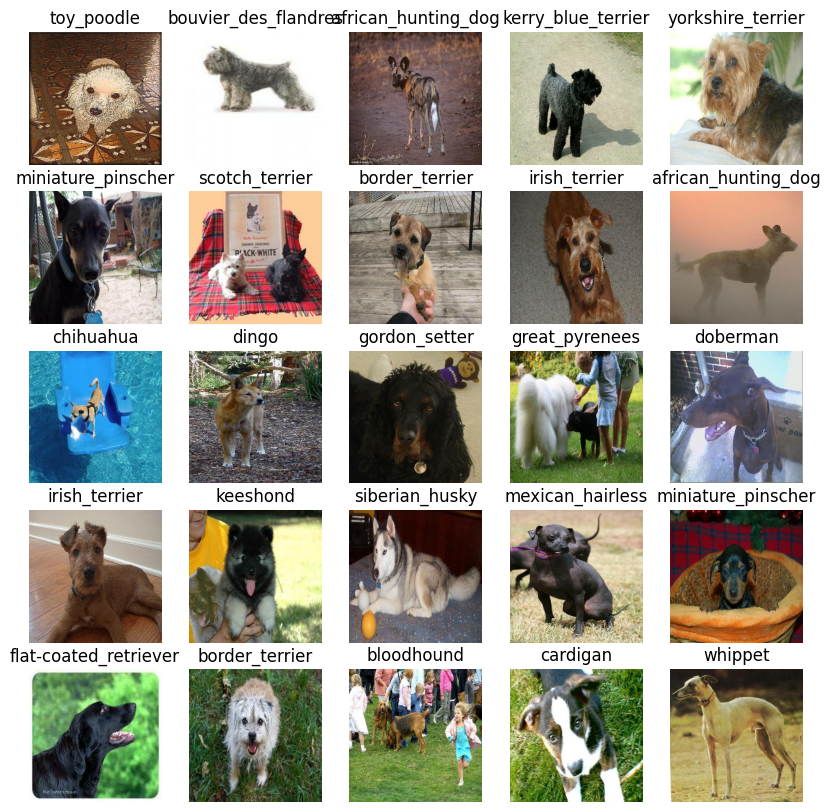

In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

##Building a model
Before we build a model, there are a few things that we need to define:

1) The input shape(our images shape, in the form of tensors)

2) The output shape(image labels,in the form of tensors)

3) The URL of the model we want to use
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [ ]:
#Setup input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]#batch,height,width,color channels
OUTPUT_SHAPE=len(unique_breeds)
#Setup model URL from tensorflow hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Let's put our inputs,outputs and model into a Keras deep learning model.

Create a function which:

1) Takes input shape,output shape and the model as parameters
2) Defines the layers in a Keras model in a sequential fashion
3) Compiles the model
5) Builds the model
5) Returns the model

In [ ]:
#Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with :",MODEL_URL)
  #Setup the model layers
  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL),tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")])#Layer 2 output layer
  #Compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model=create_model()
model.summary()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
outputs=np.ones([1,1,1280])
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

#Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress,check its progress or stop training early if a model stops improving.
We'll create the callbacks, one for TensorBoard which helps track our models and another for early stopping our model from training too long.
###TensorBoard Callback
To set up a tensorboard callback, we need:

1) Load the TensorBoard notebook extension
2) Create a TensorBoard callback which is able to save logs to a dictionary and pass it to our model's fit function
3) Visualize our models with the %tensorboard magic function


In [ ]:
import datetime
#Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  logdir=os.path.join("/content/drive/MyDrive/dog vision/logs")
  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  return tf.keras.callbacks.TensorBoard(logdir)

###Early stopping callback
Helps to stop model from overfitting by stopping training if a particular evaluation metric stops improving

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

##Training a model(on a subset of data)
Our first model is only going to train on a subset of 1000 images

In [ ]:
NUM_EPOCHS=1000#@param{type:"slider",min:10,max:10222,step:10}

#Let's  create a function which trains the model
Create a model using create_model

Setup a Tensor Board using create_tensorboard_callback()

Call the fit() function on our model using the training,validation data,, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use

Return the model


In [ ]:
#Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  #Create a model
  model=create_model()
  #Create new TensorBoard session everytime we train a model
  tensorboard=create_tensorboard_callback()
  model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,validation_freq=1,callbacks=[tensorboard,early_stopping])
  return model

In [ ]:
model=train_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/1000
25/25 [==============================] - 153s 5s/step - loss: 4.6093 - accuracy: 0.0825 - val_loss: 3.5464 - val_accuracy: 0.2200
Epoch 2/1000
25/25 [==============================] - 3s 116ms/step - loss: 1.6261 - accuracy: 0.7025 - val_loss: 2.2311 - val_accuracy: 0.5150
Epoch 3/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.5556 - accuracy: 0.9388 - val_loss: 1.7123 - val_accuracy: 0.5900
Epoch 4/1000
25/25 [==============================] - 4s 160ms/step - loss: 0.2480 - accuracy: 0.9887 - val_loss: 1.5142 - val_accuracy: 0.6350
Epoch 5/1000
25/25 [==============================] - 3s 115ms/step - loss: 0.1459 - accuracy: 0.9962 - val_loss: 1.4398 - val_accuracy: 0.6350
Epoch 6/1000
25/25 [==============================] - 3s 116ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 1.3868 - val_accuracy: 0.6450
Epoch 7/1000
25/25 [=======================

It seems that our model is overfitting.

###Checking the TensorBoard logs 
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its correctness 

In [ ]:
%tensorboard --logdir content/drive/MyDrive/dog\ vision/logs/train --port=8009

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
%reload_ext tensorboard

##Making and Evaluating predictions using a trained model



In [ ]:
predictions=model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 2s 138ms/step


array([[4.11987165e-03, 6.27398331e-05, 7.34319817e-03, ...,
        1.27245206e-03, 8.68880088e-05, 1.67428795e-03],
       [1.97361223e-03, 1.28985778e-03, 1.35810450e-02, ...,
        8.90822557e-04, 1.43890735e-03, 8.53838923e-04],
       [5.25749601e-06, 1.06387364e-04, 1.51565046e-05, ...,
        2.52040882e-05, 7.46307887e-06, 1.94816064e-04],
       ...,
       [4.82065616e-06, 1.67160513e-04, 4.36848022e-05, ...,
        2.89961899e-05, 6.52151182e-04, 3.47997084e-05],
       [2.36212485e-03, 2.53505306e-04, 2.24342904e-04, ...,
        3.73053372e-05, 3.86606735e-05, 3.56422504e-03],
       [1.00524539e-05, 1.03097809e-05, 9.10845120e-04, ...,
        7.74110493e-04, 1.53716624e-04, 9.22986583e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
#First prediction 
index=42
print(f"Max value (probability of prediction):{np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max index:{np.argmax(predictions[index])}")
print(f"Predicted label:{unique_breeds[np.argmax(predictions[index])]}")

Max value (probability of prediction):0.46263381838798523
Sum:1.0
Max index:113
Predicted label:walker_hound


In [ ]:
unique_breeds[113]

'walker_hound'

In [ ]:
#model.save('my_model.keras')

In [ ]:
#model=tf.keras.models.load_model('my_model.keras')

Having the above functionality is great but we want to do it at scale.
And it would be even better if we could see the image the prediction is being made on.
Prediction probabilities are also known as confidence levels.

In [ ]:
#Turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turns a prediction probability array into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]
pred_label=get_pred_label(predictions[81])
pred_label

'dingo'

We'll have to unzip the batch data that is the validation set so that we can make predicitions upon that data.

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
def unbatchify(data):
  images_=[]
  labels_=[]
  for i,l in val_data.unbatch().as_numpy_iterator():
    images_.append(i)
    labels_.append(unique_breeds[np.argmax(l)])
  return images_,labels_
val_images,val_labels=unbatchify(val_data)
val_images,val_labels

([array([[[0.29599646, 0.43284872, 0.3056691 ],
          [0.26635826, 0.32996926, 0.22846507],
          [0.31428418, 0.27701408, 0.22934894],
          ...,
          [0.77614343, 0.82320225, 0.8101595 ],
          [0.81291157, 0.8285351 , 0.8406944 ],
          [0.8209297 , 0.8263737 , 0.8423668 ]],
  
         [[0.2344871 , 0.31603682, 0.19543913],
          [0.3414841 , 0.36560842, 0.27241898],
          [0.45016077, 0.40117094, 0.33964607],
          ...,
          [0.7663987 , 0.8134138 , 0.81350833],
          [0.7304248 , 0.75012016, 0.76590735],
          [0.74518913, 0.76002574, 0.7830809 ]],
  
         [[0.30157745, 0.3082587 , 0.21018331],
          [0.2905954 , 0.27066195, 0.18401104],
          [0.4138316 , 0.36170745, 0.2964005 ],
          ...,
          [0.79871625, 0.8418535 , 0.8606443 ],
          [0.7957738 , 0.82859945, 0.8605655 ],
          [0.75181633, 0.77904975, 0.8155256 ]],
  
         ...,
  
         [[0.9746779 , 0.9878955 , 0.9342279 ],
          [0.9

In [ ]:
get_pred_label(labels_[0])

'cairn'

In [ ]:
get_pred_label(predictions[0])

'border_terrier'

#Now we've got ways to get:
Prediction labels

Validation labels(truth labels)

Validation images

Let's make a function to make these all a bit more visual.

We'll create a function which:

Takes an array of pps, an array of truth labels and an array of images and integers.

Convert the predicition probabilities to a predicted label.

Plot the predicted label, it's predicted probability,the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_prob,labels,images,n=1):
  """
  View the prediction,ground truth and an image for sample n
  """
  pred_prob,true_label,image=prediction_prob[n],labels[n],images[n]
  #Get the  pred label
  pred_label=get_pred_label(pred_prob)
  #Change the colour of the title depending on if the prediction is right or wrong
  if pred_label==true_label:
    color='green'
  else:
    color='red'
  #Plot image & remove ticks 
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title("{}{:0.0f}%{}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)
  

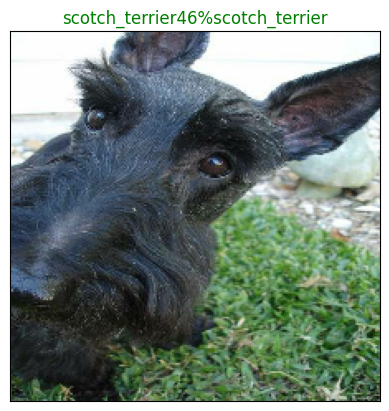

In [ ]:
plot_pred(prediction_prob=predictions,labels=val_labels,images=val_images)

Now we've got one function to visualize our model's predictions

The function will:

Take an input of prediction probabilities array and a ground truth array and an integer

Find the prediction using get_pred_label()

Find the top 10:

Prediction probabilities indexes

Predicition probabilities values

Prediction labels

Plot the top 10 prediction probability values and labels,coloring the true label green

In [ ]:
def plot_pred_conf(prediction_prob,labels,n=1):
  """
  Places the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob,true_label=prediction_prob[n],labels[n]
  pred_label=get_pred_label(pred_prob)
  #Find the top 10 prediction confidence indexes
  top10_index=pred_prob.argsort()[-10:][::-1]
  top10_probs=pred_prob[top10_index]
  top10_labels=unique_breeds[top10_index]
  #Setup plot
  top_plot=plt.bar(np.arange(len(top10_labels)),top10_probs,color='grey')
  plt.xticks(np.arange(len(top10_probs)),labels=top10_labels,rotation='vertical')
  #Change color of true label
  if np.isin(true_label,top10_probs):
    top_plot[np.argmax(top10_probs==true_label)].set_color("green")
  else:
    pass

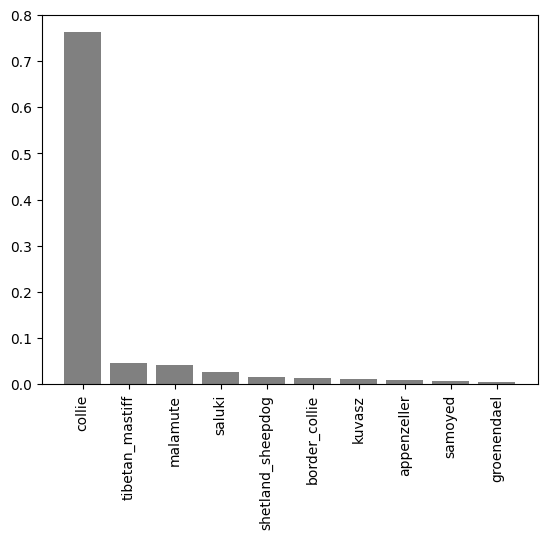

In [ ]:
plot_pred_conf(prediction_prob=predictions,labels=val_labels,n=9)

Now we've got some functions to help us visualize and evaluate out model,let's check out a few

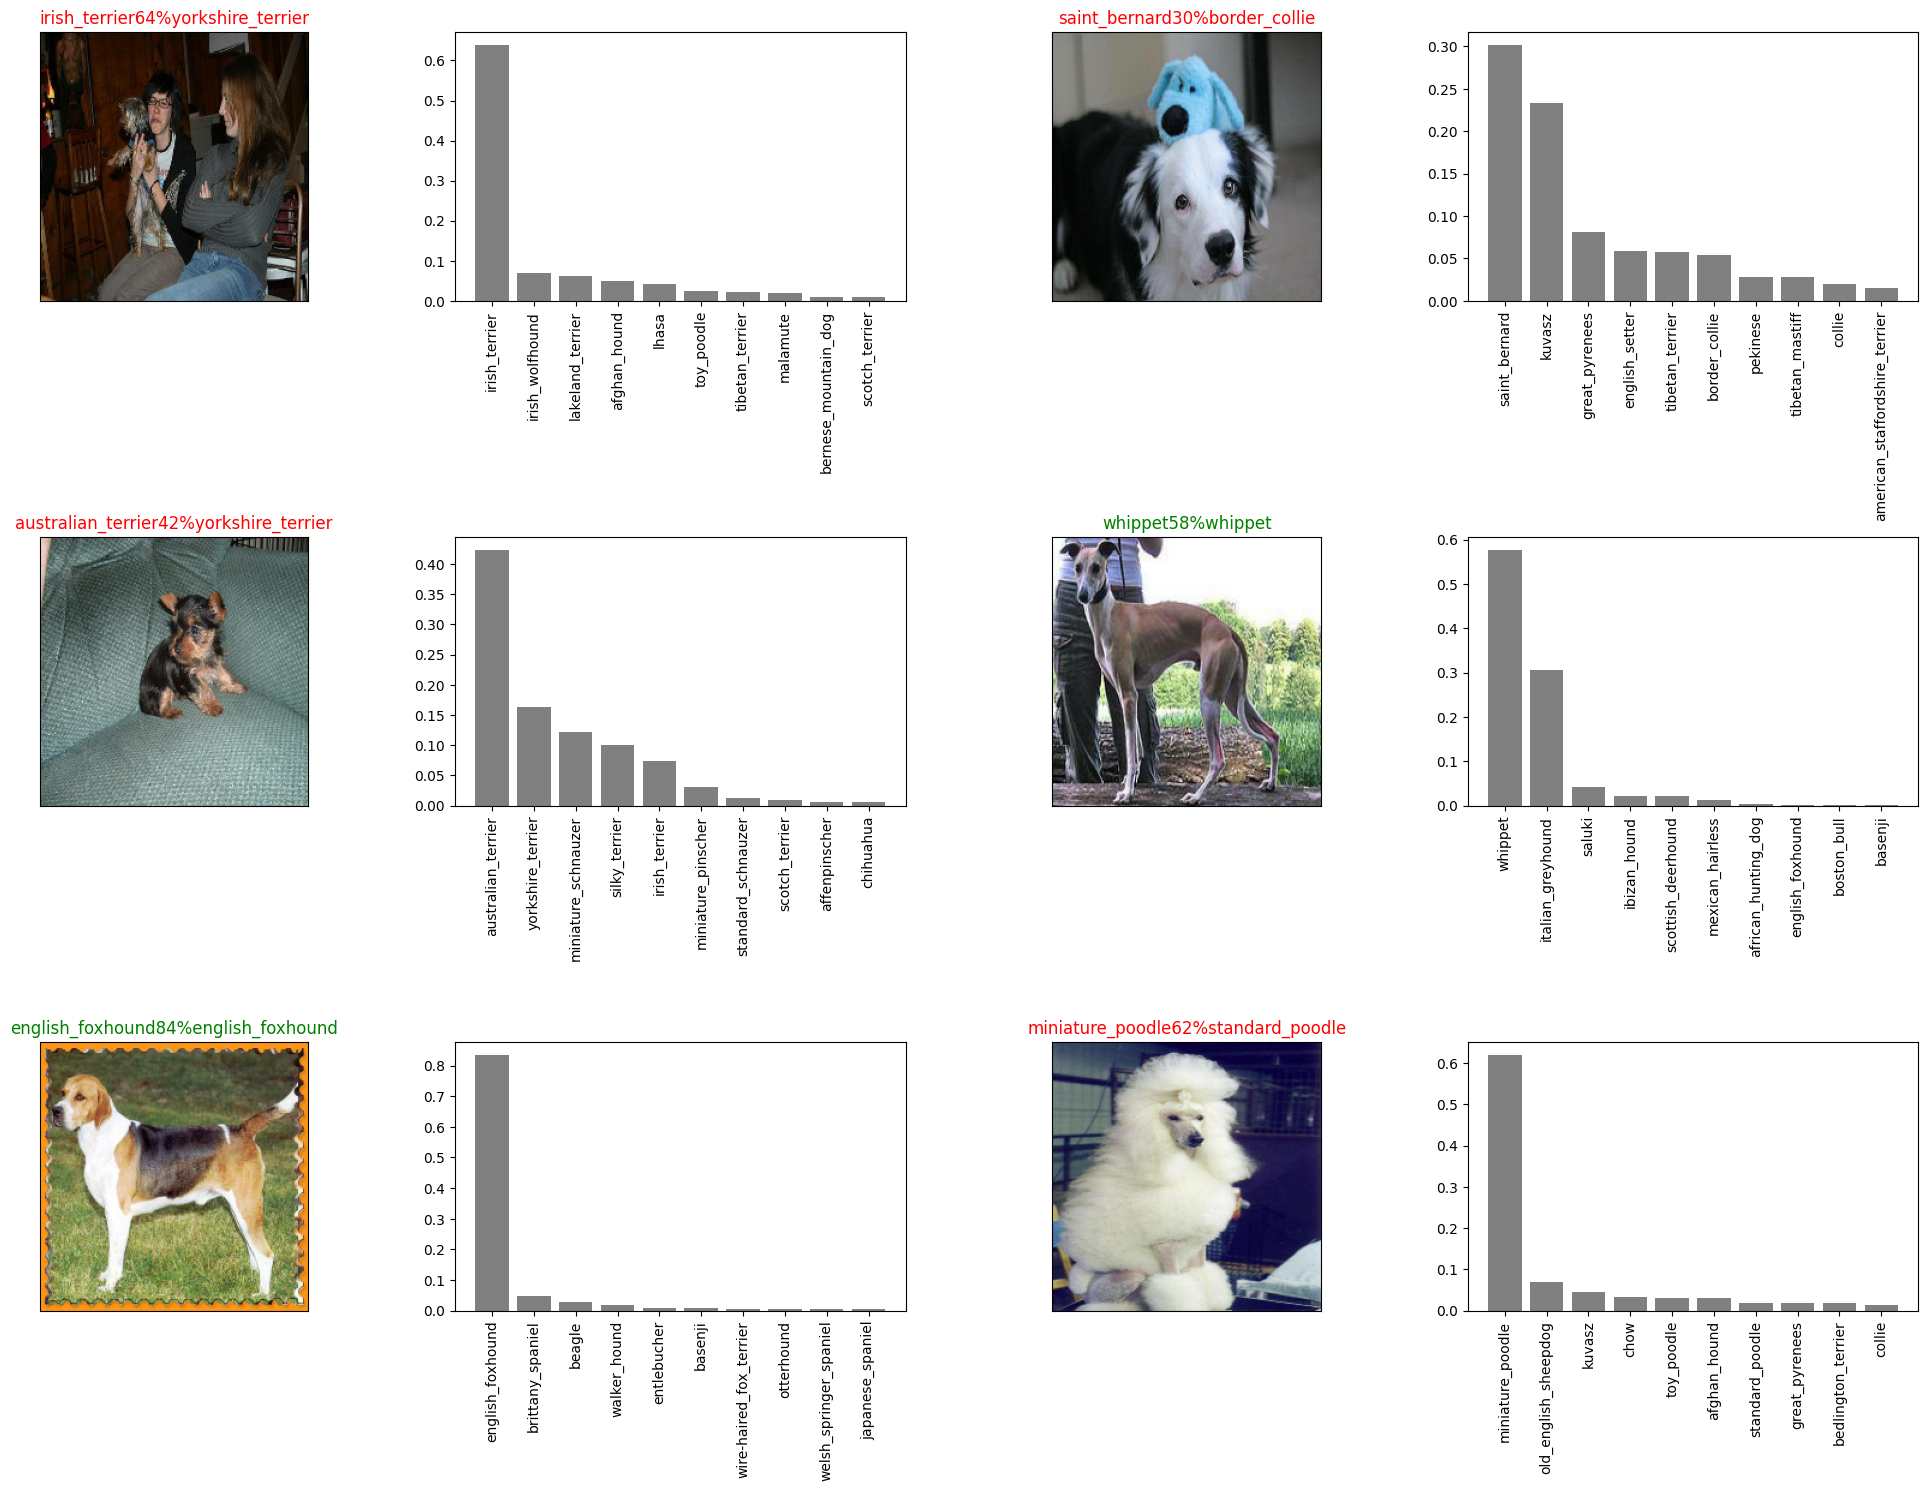

In [ ]:
#A few predictions and their values
i_multiplier=10
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_prob=predictions,labels=val_labels,images=val_images,n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_prob=predictions,labels=val_labels,n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model,suffix=None):
  """
  Saves a given model in a models directory and appends a suffix string
  """
  #Create a model directory pathname with current time
  modeldir=os.path.join("/content/drive/MyDrive/dog vision/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir + "-" + suffix + ".h5"#save format or model
  print(f"Saving model to:{model_path}")
  model.save(model_path)
  return model_path

In [ ]:
#Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified  path
  """
  model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model,suffix="1000_images_mobilenetv2")

Saving model to:/content/drive/MyDrive/dog vision/models/20230517-16191684340363-1000_images_mobilenetv2.h5


'/content/drive/MyDrive/dog vision/models/20230517-16191684340363-1000_images_mobilenetv2.h5'

In [ ]:
model_1000=load_model("/content/drive/MyDrive/dog vision/models/20230517-16191684340363-1000_images_mobilenetv2.h5")
model_1000;

In [ ]:
#Evaluate the pre-saved model
model_1000.evaluate(val_data)

7/7 [==============================] - 2s 159ms/step - loss: 1.2422 - accuracy: 0.6800


[1.2422388792037964, 0.6800000071525574]

In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 192ms/step - loss: 1.2422 - accuracy: 0.6800


[1.2422388792037964, 0.6800000071525574]

##Training a big dog model on the full data

In [ ]:
len(X),len(y)

(10222, 10222)

In [ ]:
X[:10]

['/content/drive/MyDrive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
len(X_train)

800

In [ ]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
#Create a data batch with the full dataset
full_data=create_data_batches(X,y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#Create a model for a full model
full_model=create_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [ ]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/1000
320/320 [==============================] - 41s 113ms/step - loss: 1.3789 - accuracy: 0.6661
Epoch 2/1000
320/320 [==============================] - 36s 114ms/step - loss: 0.4115 - accuracy: 0.8755
Epoch 3/1000
320/320 [==============================] - 43s 135ms/step - loss: 0.2416 - accuracy: 0.9322
Epoch 4/1000
320/320 [==============================] - 49s 154ms/step - loss: 0.1576 - accuracy: 0.9645
Epoch 5/1000
320/320 [==============================] - 35s 109ms/step - loss: 0.1053 - accuracy: 0.9797
Epoch 6/1000
320/320 [==============================] - 36s 113ms/step - loss: 0.0779 - accuracy: 0.9867
Epoch 7/1000
320/320 [==============================] - 41s 129ms/step - loss: 0.0604 - accuracy: 0.9912
Epoch 8/1000
320/320 [==============================] - 41s 128ms/step - loss: 0.0470 - accuracy: 0.9943
Epoch 9/1000
320/320 [==============================] - 47s 146ms/step - loss: 0.0377 - accuracy: 0.9955
Epoch 10/1000
320/320 [==============================] 

In [ ]:
save_model(full_model,suffix="full_image_mobilenetv2")

Saving model to:/content/drive/MyDrive/dog vision/models/20230517-17081684343305-full_image_mobilenetv2.h5


'/content/drive/MyDrive/dog vision/models/20230517-17081684343305-full_image_mobilenetv2.h5'

In [ ]:
loaded_full_model=load_model('/content/drive/MyDrive/dog vision/models/20230517-17081684343305-full_image_mobilenetv2.h5')

##Making predictions on the test data

##Create data batches of test data
To make predictions on the test data:

Get the test image filenames

Convert the filenames into test batches

Make prediction array by passing the test batches to the predict() method called on our  model

In [ ]:
test_path="/content/drive/MyDrive/dog vision/test/"
test_filenames=[test_path+fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/dog vision/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/dog vision/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 '/content/drive/MyDrive/dog vision/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 '/content/drive/MyDrive/dog vision/test/e7e9624f2a2e61ab187358f5968bfde8.jpg',
 '/content/drive/MyDrive/dog vision/test/e7e9dd51302fe08c1c89a550e183cf07.jpg',
 '/content/drive/MyDrive/dog vision/test/e7ed96b272013c6de9505a753816ce75.jpg',
 '/content/drive/MyDrive/dog vision/test/e7f95aabf775a636b3893ffa120adaf9.jpg',
 '/content/drive/MyDrive/dog vision/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 '/content/drive/MyDrive/dog vision/test/e7feb64da6aae1ef8e62453f6660d0c5.jpg',
 '/content/drive/MyDrive/dog vision/test/e806a67a05289ac6de6831001664b81b.jpg']

In [ ]:
len(test_filenames)
#Create test data batch
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
#Make predictions on test batch using the loaded full model
test_predictions=loaded_full_model.predict(test_data,verbose=1)

361/361 [==============================] - 273s 754ms/step


In [ ]:
#Save predictions (Numpy array) to csv file(for access later)
np.savetxt("/content/drive/MyDrive/dog vision/preds_array.csv",test_predictions,delimiter=',')

In [ ]:
test_predictions[:10]

array([[7.8590162e-08, 1.2795794e-06, 2.2288364e-07, ..., 5.8094088e-07,
        1.3624517e-10, 2.0391104e-08],
       [8.0492697e-08, 3.3123993e-11, 6.4195251e-06, ..., 3.1654873e-10,
        1.2791390e-09, 4.6836155e-07],
       [9.0035007e-07, 1.3938139e-08, 2.3340254e-08, ..., 1.5191341e-10,
        4.6265453e-07, 2.2817861e-07],
       ...,
       [2.2136231e-09, 2.4220915e-11, 6.4390981e-10, ..., 8.8033990e-11,
        3.4862491e-11, 1.4417741e-08],
       [5.0433503e-12, 1.8707426e-04, 2.0492534e-09, ..., 4.5191933e-04,
        1.1687896e-10, 2.0182468e-07],
       [9.9668306e-01, 7.5877813e-07, 1.3058768e-07, ..., 4.2790820e-09,
        1.5491715e-06, 5.4333423e-06]], dtype=float32)

In [ ]:
test_predictions.shape

(11529, 120)

##Preparing test dataset predicitions for Kaggle
Kaggle submission requires a Data Frame with ID and a column for each different dog breed
Add data to the ID column by extracting the

In [ ]:
["id"]+list(unique_breeds)

[<function id(obj, /)>,
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountai

In [ ]:
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df["id"]=test_ids

In [ ]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids

['e7be7b911a4cba9fdfa4105ec4776370',
 'e7ce78e874945f182a4f5149aa505b09',
 'e7dc8cc599049ea9fa2a172c88646c57',
 'e7e9624f2a2e61ab187358f5968bfde8',
 'e7e9dd51302fe08c1c89a550e183cf07',
 'e7ed96b272013c6de9505a753816ce75',
 'e7f95aabf775a636b3893ffa120adaf9',
 'e7fcdf9671a6593b638cbee42842f981',
 'e7feb64da6aae1ef8e62453f6660d0c5',
 'e806a67a05289ac6de6831001664b81b',
 'e800b6c8d2904e205d67ada800907762',
 'e806fbb5ca4dd3a094f7819bd810cc65',
 'e816f0027a2c6348dbf12b79c70541bc',
 'e807c4b5025b0aa4dcbd5df2765aa8e4',
 'e8232c9a79f0e77e9b4c5fca60682d41',
 'e823ee1ca007c88600806925a6f2bce1',
 'e826c0ae5dd27876781c10e1be444fd5',
 'e8319b1410a984291d71a3e60c84d86c',
 'e83d7fa8fdfba0ec577f9c8df811d439',
 'e83fec66a32873298df9fa5fdac113aa',
 'e83f4c0ff6dec86d89d0f8b70ecd3cea',
 'e8505566fd9116b812e306ca196b62da',
 'e850770a6575a34b1c7ad4b401692553',
 'e85291fc6ba44e39defc7769fa020646',
 'e857866af777793d2c114b09ea7a685a',
 'e85b19a69be67eaef9fe58b7e689ee81',
 'e85d4e2707683df0e6387e19b67b873d',
 

In [ ]:
preds_df.head()

id affenpinscher afghan_hound  \
0  e7be7b911a4cba9fdfa4105ec4776370           NaN          NaN   
1  e7ce78e874945f182a4f5149aa505b09           NaN          NaN   
2  e7dc8cc599049ea9fa2a172c88646c57           NaN          NaN   
3  e7e9624f2a2e61ab187358f5968bfde8           NaN          NaN   
4  e7e9dd51302fe08c1c89a550e183cf07           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
#Add the prediction probs to each dog breed column
preds_df[list(unique_breeds)]=test_predictions

In [ ]:
preds_df.to_csv("/content/drive/MyDrive/dog vision/full_model_predictions_submission_1_mobilenetV2.csv")